# Exercise 05


## Using the example_retail_sales dataset:
- Standarize the dataset using np.log
- Using prophet forescast the next 6 months of the sales logarithm
- Predict the next 6 months of sales

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

In [1]:
retail = pd.read_csv('C:/Users/Carlos P/Projects/Data/example_retail_sales.csv')
retail.head()

Importing plotly failed. Interactive plots will not work.


FileNotFoundError: [Errno 2] File C:/Users/Carlos P/Projects/Data/example_retail_sales.csv does not exist: 'C:/Users/Carlos P/Projects/Data/example_retail_sales.csv'

In [2]:
df = pd.DataFrame()
df['ds'] = pd.to_datetime(retail['ds'])
df['y'] = retail['y']
df.head()

,ds,y
0,1992-01-01,146376
1,1992-02-01,147079
2,1992-03-01,159336
3,1992-04-01,163669
4,1992-05-01,170068


In [3]:
y_log = pd.DataFrame(np.log(df['y']))
y_log = y_log.rename(columns={'y': 'y_log'})
y_log.head()

,y_log
0,11.893934
1,11.898725
2,11.978770
3,12.005601
4,12.043954


In [4]:
df = pd.concat([df, y_log], axis=1)
del df['y']
df = df.rename(columns={'y_log': 'y'})
df.head()

,ds,y
0,1992-01-01,11.893934
1,1992-02-01,11.898725
2,1992-03-01,11.978770
3,1992-04-01,12.005601
4,1992-05-01,12.043954


In [5]:
df.tail()

,ds,y
288,2016-01-01,12.901537
289,2016-02-01,12.932543
290,2016-03-01,13.039184
291,2016-04-01,13.019078
292,2016-05-01,13.063507


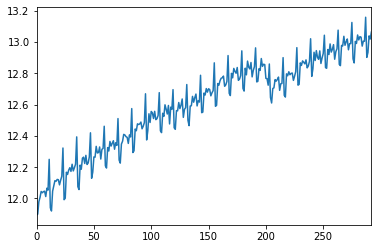

In [6]:
df['y'].plot();

- Recuerden, toca hacer el rolling forecast del ultimo 10% de fechas con prophet

In [7]:
history_train = df.head(int(len(df)*(0.9)))
history_train.tail()

,ds,y
258,2013-07-01,12.953606
259,2013-08-01,12.982986
260,2013-09-01,12.889672
261,2013-10-01,12.937815
262,2013-11-01,12.956571


In [8]:
test = df.tail(int(len(df)*(0.1)))
test.tail()

,ds,y
288,2016-01-01,12.901537
289,2016-02-01,12.932543
290,2016-03-01,13.039184
291,2016-04-01,13.019078
292,2016-05-01,13.063507


In [9]:
m = Prophet()
m.fit(history_train)
for t in range(1, len(test)+1):
    future = test[['ds']].head(t)
    forecast = m.predict(future)
    df_fcast = forecast[['ds', 'yhat']]
    df_fcast = df_fcast.rename(columns={'yhat': 'y'})
    frm = [history_train, df_fcast]
    history_train = pd.concat(frm)
    m = Prophet()
    m.fit(history_train)
    print('predicted= ', forecast[['ds', 'yhat']])

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=            ds       yhat
0 2014-01-01  12.874869


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=            ds       yhat
0 2014-01-01  12.874272
1 2014-02-01  12.868591


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=            ds       yhat
0 2014-01-01  12.873945
1 2014-02-01  12.867961
2 2014-03-01  12.994804


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=            ds       yhat
0 2014-01-01  12.873497
1 2014-02-01  12.868300
2 2014-03-01  12.994733
3 2014-04-01  12.982410


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=            ds       yhat
0 2014-01-01  12.872158
1 2014-02-01  12.866454
2 2014-03-01  12.993930
3 2014-04-01  12.982387
4 2014-05-01  13.036534


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=            ds       yhat
0 2014-01-01  12.871744
1 2014-02-01  12.865564
2 2014-03-01  12.992241
3 2014-04-01  12.979989
4 2014-05-01  13.033514
5 2014-06-01  13.017509


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=            ds       yhat
0 2014-01-01  12.870629
1 2014-02-01  12.864673
2 2014-03-01  12.991506
3 2014-04-01  12.979473
4 2014-05-01  13.033195
5 2014-06-01  13.016616
6 2014-07-01  13.014677


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=            ds       yhat
0 2014-01-01  12.870603
1 2014-02-01  12.864106
2 2014-03-01  12.990398
3 2014-04-01  12.977624
4 2014-05-01  13.030717
5 2014-06-01  13.014264
6 2014-07-01  13.012569
7 2014-08-01  13.038437


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=            ds       yhat
0 2014-01-01  12.869775
1 2014-02-01  12.863689
2 2014-03-01  12.990445
3 2014-04-01  12.978064
4 2014-05-01  13.031422
5 2014-06-01  13.014907
6 2014-07-01  13.012669
7 2014-08-01  13.037776
8 2014-09-01  12.970212


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=            ds       yhat
0 2014-01-01  12.870314
1 2014-02-01  12.864462
2 2014-03-01  12.990899
3 2014-04-01  12.978054
4 2014-05-01  13.030916
5 2014-06-01  13.014298
6 2014-07-01  13.012394
7 2014-08-01  13.037967
8 2014-09-01  12.971044
9 2014-10-01  13.001576


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=             ds       yhat
0  2014-01-01  12.869871
1  2014-02-01  12.863719
2  2014-03-01  12.990527
3  2014-04-01  12.978076
4  2014-05-01  13.031380
5  2014-06-01  13.015085
6  2014-07-01  13.013665
7  2014-08-01  13.039817
8  2014-09-01  12.973533
9  2014-10-01  13.004613
10 2014-11-01  13.018326


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=             ds       yhat
0  2014-01-01  12.869288
1  2014-02-01  12.863406
2  2014-03-01  12.990312
3  2014-04-01  12.978242
4  2014-05-01  13.031984
5  2014-06-01  13.015965
6  2014-07-01  13.014577
7  2014-08-01  13.040131
8  2014-09-01  12.973206
9  2014-10-01  13.003612
10 2014-11-01  13.017672
11 2014-12-01  13.176248


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=             ds       yhat
0  2014-01-01  12.869459
1  2014-02-01  12.863925
2  2014-03-01  12.990755
3  2014-04-01  12.978205
4  2014-05-01  13.031584
5  2014-06-01  13.015308
6  2014-07-01  13.013891
7  2014-08-01  13.040060
8  2014-09-01  12.973797
9  2014-10-01  13.004917
10 2014-11-01  13.019185
11 2014-12-01  13.177547
12 2015-01-01  12.920642


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=             ds       yhat
0  2014-01-01  12.869386
1  2014-02-01  12.863558
2  2014-03-01  12.990682
3  2014-04-01  12.978414
4  2014-05-01  13.031843
5  2014-06-01  13.015641
6  2014-07-01  13.014180
7  2014-08-01  13.040346
8  2014-09-01  12.973815
9  2014-10-01  13.004649
10 2014-11-01  13.018691
11 2014-12-01  13.176738
12 2015-01-01  12.919429
13 2015-02-01  12.924370


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=             ds       yhat
0  2014-01-01  12.869418
1  2014-02-01  12.863575
2  2014-03-01  12.990489
3  2014-04-01  12.978451
4  2014-05-01  13.032093
5  2014-06-01  13.015998
6  2014-07-01  13.014480
7  2014-08-01  13.040417
8  2014-09-01  12.973443
9  2014-10-01  13.004296
10 2014-11-01  13.018182
11 2014-12-01  13.176456
12 2015-01-01  12.919827
13 2015-02-01  12.924765
14 2015-03-01  13.039866


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=             ds       yhat
0  2014-01-01  12.869564
1  2014-02-01  12.863953
2  2014-03-01  12.990699
3  2014-04-01  12.978535
4  2014-05-01  13.031848
5  2014-06-01  13.015564
6  2014-07-01  13.014040
7  2014-08-01  13.040052
8  2014-09-01  12.973537
9  2014-10-01  13.004449
10 2014-11-01  13.018453
11 2014-12-01  13.176648
12 2015-01-01  12.919551
13 2015-02-01  12.923832
14 2015-03-01  13.041742
15 2015-04-01  13.030039


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=             ds       yhat
0  2014-01-01  12.869768
1  2014-02-01  12.863633
2  2014-03-01  12.990621
3  2014-04-01  12.978366
4  2014-05-01  13.031786
5  2014-06-01  13.015512
6  2014-07-01  13.014018
7  2014-08-01  13.040062
8  2014-09-01  12.973506
9  2014-10-01  13.004305
10 2014-11-01  13.018260
11 2014-12-01  13.176337
12 2015-01-01  12.919812
13 2015-02-01  12.924767
14 2015-03-01  13.041547
15 2015-04-01  13.029782
16 2015-05-01  13.082278


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=             ds       yhat
0  2014-01-01  12.869722
1  2014-02-01  12.863588
2  2014-03-01  12.990436
3  2014-04-01  12.978252
4  2014-05-01  13.031725
5  2014-06-01  13.015546
6  2014-07-01  13.014272
7  2014-08-01  13.040398
8  2014-09-01  12.973829
9  2014-10-01  13.004341
10 2014-11-01  13.018273
11 2014-12-01  13.176696
12 2015-01-01  12.919937
13 2015-02-01  12.924881
14 2015-03-01  13.039935
15 2015-04-01  13.028961
16 2015-05-01  13.081963
17 2015-06-01  13.070977


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=             ds       yhat
0  2014-01-01  12.869666
1  2014-02-01  12.863834
2  2014-03-01  12.990465
3  2014-04-01  12.978456
4  2014-05-01  13.032077
5  2014-06-01  13.015823
6  2014-07-01  13.014238
7  2014-08-01  13.040078
8  2014-09-01  12.973496
9  2014-10-01  13.004325
10 2014-11-01  13.018246
11 2014-12-01  13.176405
12 2015-01-01  12.918975
13 2015-02-01  12.923198
14 2015-03-01  13.041637
15 2015-04-01  13.029711
16 2015-05-01  13.082026
17 2015-06-01  13.070738
18 2015-07-01  13.066986


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=             ds       yhat
0  2014-01-01  12.869507
1  2014-02-01  12.863782
2  2014-03-01  12.990820
3  2014-04-01  12.978451
4  2014-05-01  13.031868
5  2014-06-01  13.015627
6  2014-07-01  13.014132
7  2014-08-01  13.040005
8  2014-09-01  12.973267
9  2014-10-01  13.004361
10 2014-11-01  13.018647
11 2014-12-01  13.177075
12 2015-01-01  12.920399
13 2015-02-01  12.925219
14 2015-03-01  13.039955
15 2015-04-01  13.028744
16 2015-05-01  13.081842
17 2015-06-01  13.070994
18 2015-07-01  13.067239
19 2015-08-01  13.094987


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=             ds       yhat
0  2014-01-01  12.869469
1  2014-02-01  12.863679
2  2014-03-01  12.990544
3  2014-04-01  12.978501
4  2014-05-01  13.032035
5  2014-06-01  13.015909
6  2014-07-01  13.014431
7  2014-08-01  13.040522
8  2014-09-01  12.973738
9  2014-10-01  13.004380
10 2014-11-01  13.018212
11 2014-12-01  13.176433
12 2015-01-01  12.919559
13 2015-02-01  12.924176
14 2015-03-01  13.040115
15 2015-04-01  13.029324
16 2015-05-01  13.082455
17 2015-06-01  13.071224
18 2015-07-01  13.067284
19 2015-08-01  13.095331
20 2015-09-01  13.027682


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=             ds       yhat
0  2014-01-01  12.869770
1  2014-02-01  12.863835
2  2014-03-01  12.990759
3  2014-04-01  12.978563
4  2014-05-01  13.032059
5  2014-06-01  13.015900
6  2014-07-01  13.014320
7  2014-08-01  13.040085
8  2014-09-01  12.973139
9  2014-10-01  13.003695
10 2014-11-01  13.017916
11 2014-12-01  13.176297
12 2015-01-01  12.919639
13 2015-02-01  12.924789
14 2015-03-01  13.040609
15 2015-04-01  13.029230
16 2015-05-01  13.082130
17 2015-06-01  13.071217
18 2015-07-01  13.067514
19 2015-08-01  13.095337
20 2015-09-01  13.027323
21 2015-10-01  13.052789


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=             ds       yhat
0  2014-01-01  12.869904
1  2014-02-01  12.863685
2  2014-03-01  12.990415
3  2014-04-01  12.978201
4  2014-05-01  13.031717
5  2014-06-01  13.015574
6  2014-07-01  13.014156
7  2014-08-01  13.040194
8  2014-09-01  12.973632
9  2014-10-01  13.004532
10 2014-11-01  13.018797
11 2014-12-01  13.176981
12 2015-01-01  12.919763
13 2015-02-01  12.924356
14 2015-03-01  13.039383
15 2015-04-01  13.028639
16 2015-05-01  13.081725
17 2015-06-01  13.070868
18 2015-07-01  13.067117
19 2015-08-01  13.095151
20 2015-09-01  13.027478
21 2015-10-01  13.053368
22 2015-11-01  13.072075


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=             ds       yhat
0  2014-01-01  12.869259
1  2014-02-01  12.863676
2  2014-03-01  12.990947
3  2014-04-01  12.978761
4  2014-05-01  13.032185
5  2014-06-01  13.015965
6  2014-07-01  13.014403
7  2014-08-01  13.040147
8  2014-09-01  12.973360
9  2014-10-01  13.003895
10 2014-11-01  13.018061
11 2014-12-01  13.176483
12 2015-01-01  12.920021
13 2015-02-01  12.924822
14 2015-03-01  13.040585
15 2015-04-01  13.029251
16 2015-05-01  13.082107
17 2015-06-01  13.071070
18 2015-07-01  13.067350
19 2015-08-01  13.095223
20 2015-09-01  13.027290
21 2015-10-01  13.052671
22 2015-11-01  13.071460
23 2015-12-01  13.228822


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=             ds       yhat
0  2014-01-01  12.869875
1  2014-02-01  12.863622
2  2014-03-01  12.990722
3  2014-04-01  12.978484
4  2014-05-01  13.031911
5  2014-06-01  13.015657
6  2014-07-01  13.014150
7  2014-08-01  13.040122
8  2014-09-01  12.973484
9  2014-10-01  13.004256
10 2014-11-01  13.018374
11 2014-12-01  13.176823
12 2015-01-01  12.920022
13 2015-02-01  12.925113
14 2015-03-01  13.039399
15 2015-04-01  13.028735
16 2015-05-01  13.081928
17 2015-06-01  13.070977
18 2015-07-01  13.067344
19 2015-08-01  13.095219
20 2015-09-01  13.027320
21 2015-10-01  13.052960
22 2015-11-01  13.071505
23 2015-12-01  13.228910
24 2016-01-01  12.970358


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=             ds       yhat
0  2014-01-01  12.869479
1  2014-02-01  12.863483
2  2014-03-01  12.990623
3  2014-04-01  12.978427
4  2014-05-01  13.031837
5  2014-06-01  13.015581
6  2014-07-01  13.013993
7  2014-08-01  13.039791
8  2014-09-01  12.972957
9  2014-10-01  13.003829
10 2014-11-01  13.017992
11 2014-12-01  13.176569
12 2015-01-01  12.920053
13 2015-02-01  12.925173
14 2015-03-01  13.040445
15 2015-04-01  13.029362
16 2015-05-01  13.082323
17 2015-06-01  13.071264
18 2015-07-01  13.067405
19 2015-08-01  13.095094
20 2015-09-01  13.027076
21 2015-10-01  13.053002
22 2015-11-01  13.071591
23 2015-12-01  13.229069
24 2016-01-01  12.970347
25 2016-02-01  12.986524


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=             ds       yhat
0  2014-01-01  12.869644
1  2014-02-01  12.863805
2  2014-03-01  12.990603
3  2014-04-01  12.978434
4  2014-05-01  13.031888
5  2014-06-01  13.015747
6  2014-07-01  13.014204
7  2014-08-01  13.040009
8  2014-09-01  12.973325
9  2014-10-01  13.004188
10 2014-11-01  13.018382
11 2014-12-01  13.176815
12 2015-01-01  12.920132
13 2015-02-01  12.924659
14 2015-03-01  13.040274
15 2015-04-01  13.029145
16 2015-05-01  13.082103
17 2015-06-01  13.071015
18 2015-07-01  13.067154
19 2015-08-01  13.094986
20 2015-09-01  13.027289
21 2015-10-01  13.053267
22 2015-11-01  13.071978
23 2015-12-01  13.229241
24 2016-01-01  12.970135
25 2016-02-01  12.985254
26 2016-03-01  13.102494


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=             ds       yhat
0  2014-01-01  12.869710
1  2014-02-01  12.863306
2  2014-03-01  12.990557
3  2014-04-01  12.978310
4  2014-05-01  13.031657
5  2014-06-01  13.015479
6  2014-07-01  13.014005
7  2014-08-01  13.040017
8  2014-09-01  12.973430
9  2014-10-01  13.004295
10 2014-11-01  13.018453
11 2014-12-01  13.176903
12 2015-01-01  12.920218
13 2015-02-01  12.925364
14 2015-03-01  13.039289
15 2015-04-01  13.028558
16 2015-05-01  13.081649
17 2015-06-01  13.070986
18 2015-07-01  13.067384
19 2015-08-01  13.095212
20 2015-09-01  13.027300
21 2015-10-01  13.052987
22 2015-11-01  13.071576
23 2015-12-01  13.229039
24 2016-01-01  12.970646
25 2016-02-01  12.987261
26 2016-03-01  13.104376
27 2016-04-01  13.089420


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


predicted=             ds       yhat
0  2014-01-01  12.869414
1  2014-02-01  12.863574
2  2014-03-01  12.990667
3  2014-04-01  12.978496
4  2014-05-01  13.032024
5  2014-06-01  13.015855
6  2014-07-01  13.014333
7  2014-08-01  13.040208
8  2014-09-01  12.973613
9  2014-10-01  13.004380
10 2014-11-01  13.018475
11 2014-12-01  13.176615
12 2015-01-01  12.919870
13 2015-02-01  12.924711
14 2015-03-01  13.039899
15 2015-04-01  13.028925
16 2015-05-01  13.081998
17 2015-06-01  13.071084
18 2015-07-01  13.067350
19 2015-08-01  13.095229
20 2015-09-01  13.027587
21 2015-10-01  13.053342
22 2015-11-01  13.071810
23 2015-12-01  13.228952
24 2016-01-01  12.969909
25 2016-02-01  12.985759
26 2016-03-01  13.102827
27 2016-04-01  13.088758
28 2016-05-01  13.143484


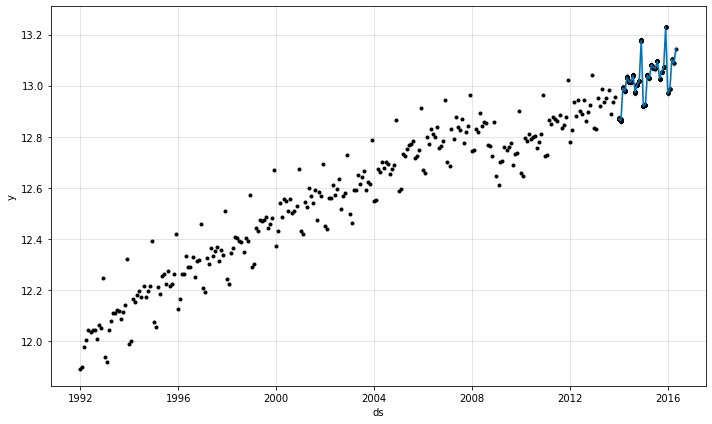

In [10]:
fig1 = m.plot(forecast)

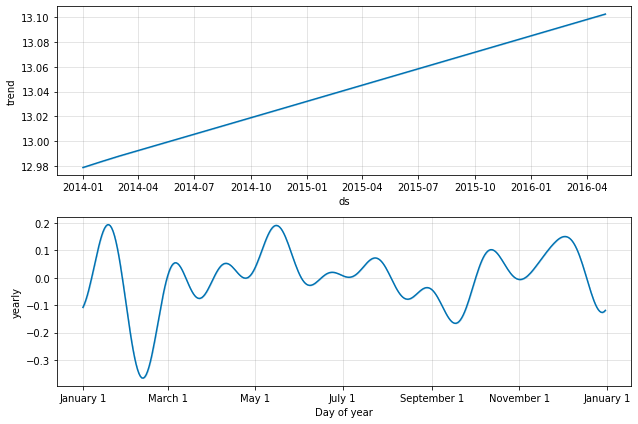

In [11]:
m.plot_components(forecast);